<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Dispersionnyj_analiz_i_vidy_oshibok._AB_testy/DZ_Kondratev_STPY-48_AB_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [82]:
 # Подгрузим пакеты
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [83]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Напишите Ваш код для решения задачи

Нет различия в эффекте у этих пациентов


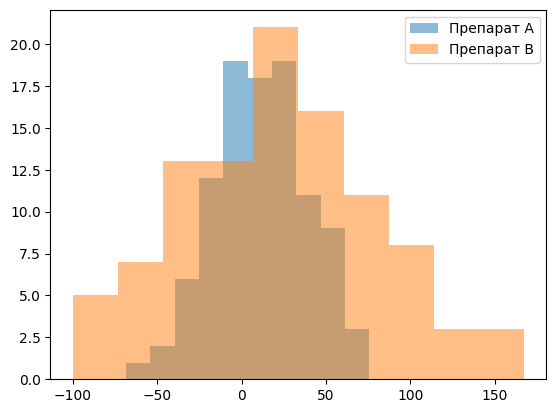

In [84]:
# Оценка различия в эффекте
result = stats.ttest_ind(A, B)
alpha = 0.05

if result.pvalue < alpha:
    print('Есть различие в эффекте у этих пациентов')
else:
    print('Нет различия в эффекте у этих пациентов')

# Визуализация результатов
plt.hist(A, alpha=0.5, label='Препарат A')
plt.hist(B, alpha=0.5, label='Препарат B')
plt.legend()
plt.show()

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [85]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Напишите Ваш код для решения задачи

Есть эффект от удобрения по сравнению с минералкой


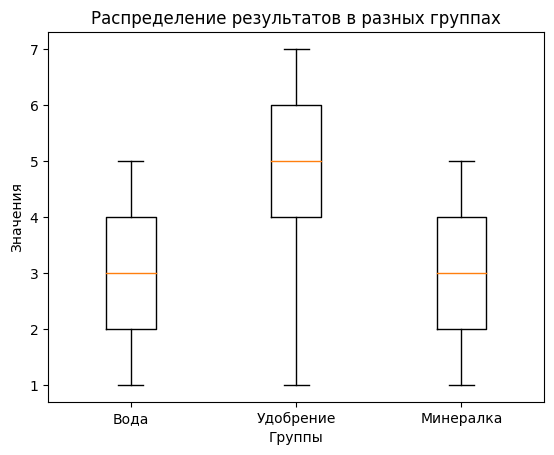

In [86]:
# Дисперсионный анализ
f_statistic, p_value = stats.f_oneway(water, nutri, mineral)
alpha = 0.05

if p_value < alpha:
    print('Есть эффект от удобрения по сравнению с минералкой')
else:
    print('Нет эффекта от удобрения по сравнению с минералкой')

# Визуализация результатов
data = [water, nutri, mineral]
labels = ['Вода', 'Удобрение', 'Минералка']

plt.boxplot(data, labels=labels)
plt.xlabel('Группы')
plt.ylabel('Значения')
plt.title('Распределение результатов в разных группах')
plt.show()

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [87]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

<ipython-input-87-e392f90565af>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос.

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции.

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

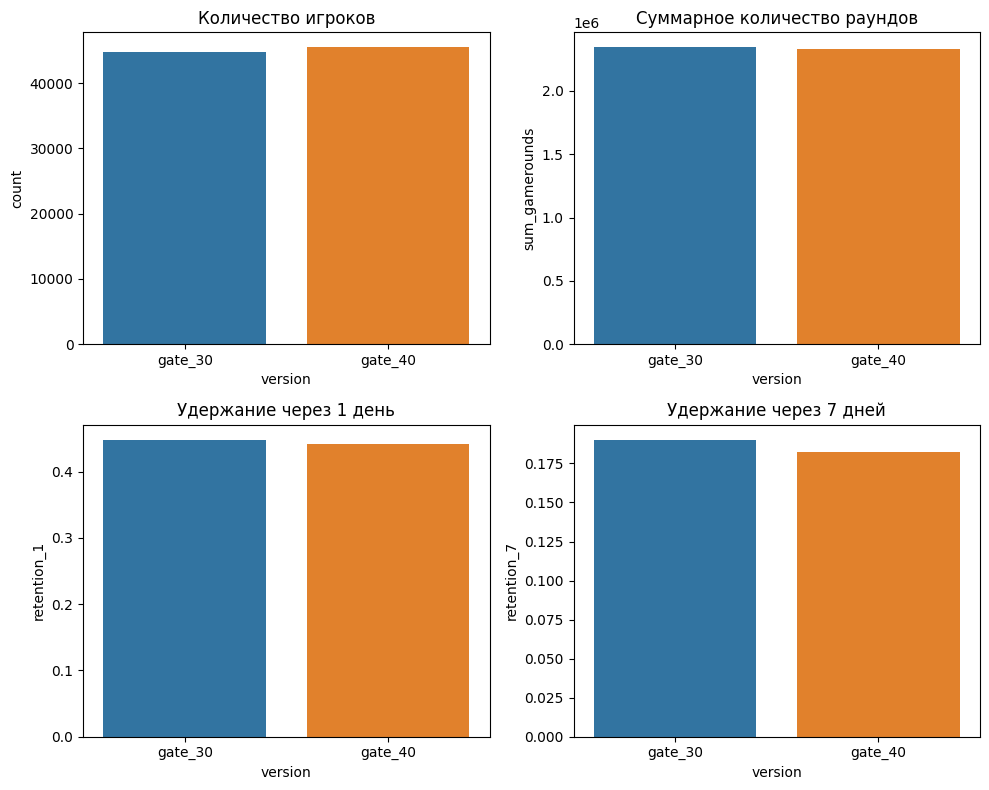

Установка ворот на 30 уровне приводит к лучшему удержанию игроков через 7 дней


In [100]:
# Группировка данных по версиям игры
grouped_data = data.groupby('version').agg({
    'userid': 'count',
    'sum_gamerounds': 'sum',
    'retention_1': 'mean',
    'retention_7': 'mean'
}).rename(columns={'userid': 'count'})
# В данном коде столбцы 'retention_1' и 'retention_7' являются бинарными,
# содержащими значения True или False, представляющие соответственно удержание
# пользователя на первый и седьмой день. Вычисление среднего значения для этих столбцов
# даст нам пропорцию пользователей, которые остались на этих днях в каждой группе версий игры.

# Визуализация с помощью графиков
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Количество игроков в каждой версии
sns.barplot(x=grouped_data.index, y='count', data=grouped_data, ax=axes[0, 0])
axes[0, 0].set_title('Количество игроков')

# Количество сыгранных раундов в каждой версии
sns.barplot(x=grouped_data.index, y='sum_gamerounds', data=grouped_data, ax=axes[0, 1])
axes[0, 1].set_title('Суммарное количество раундов')

# Удержание игроков через 1 день после установки
sns.barplot(x=grouped_data.index, y='retention_1', data=grouped_data, ax=axes[1, 0])
axes[1, 0].set_title('Удержание через 1 день')

# Удержание игроков через 7 дней после установки
sns.barplot(x=grouped_data.index, y='retention_7', data=grouped_data, ax=axes[1, 1])
axes[1, 1].set_title('Удержание через 7 дней')

plt.tight_layout()
plt.show()

# Статистический тест для сравнения удержания
gate_30_retention_7 = data[data['version'] == 'gate_30']['retention_7']
gate_40_retention_7 = data[data['version'] == 'gate_40']['retention_7']

t_statistic_7, p_value_7 = stats.ttest_ind(gate_30_retention_7, gate_40_retention_7)


alpha = 0.05

if p_value_7 < alpha:
    print('Установка ворот на 30 уровне приводит к лучшему удержанию игроков через 7 дней')
else:
    print('Установка ворот на 40 уровне приводит к лучшему удержанию игроков через 7 дней')



In [101]:
print(grouped_data)
print('\n', t_statistic_7)
print('\n', p_value_7)

         count  sum_gamerounds  retention_1  retention_7
version                                                 
gate_30  44700         2344795     0.448188     0.190201
gate_40  45489         2333530     0.442283     0.182000

 3.1644994996802778

 0.0015540151201088365


выводы:

1. Количество игроков: Версия `gate_40` имеет незначительное преимущество в количестве игроков, но разница невелика.

2. Суммарное количество раундов: Версии игры имеют примерно одинаковое количество сыгранных раундов, разница незначительна.

3. Удержание через 1 день: Удержание игроков через 1 день после установки версии `gate_30` немного выше, чем у версии `gate_40`.

4. Удержание через 7 дней: Удержание игроков через 7 дней после установки версии `gate_30` также немного выше, чем у версии `gate_40`.

Полученные результаты могут указывать на то, что установка ворот на 30 уровне приводит к лучшему удержанию игроков как через 1 день, так и через 7 дней.

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [108]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-108-1e6d6fedfab1>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
# Отбор нужных строк
grass_pokemon = pokemon.loc[pokemon['Class 1'] == 'Grass', 'Attack']
rock_pokemon = pokemon.loc[pokemon['Class 1'] == 'Rock', 'Attack']

In [107]:
from scipy.stats import levene

statistic, p_value = levene(grass_pokemon, rock_pokemon)

alpha = 0.05
if p_value < alpha:
    print("Дисперсии выборок не равны")
else:
    print("Дисперсии выборок равны")

Дисперсии выборок не равны


**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`.

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`).
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [96]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов.
Оук предложил разобраться в этом Вам.

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь!

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [97]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']